In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [41]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, roc_curve, roc_auc_score,mean_squared_error, r2_score,classification_report,ConfusionMatrixDisplay, accuracy_score

from sklearn.tree import DecisionTreeClassifier


In [42]:
data=pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

as we can see there are no null entrie then we can proceed further 


In [44]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

plotting corelation and other visualisations to get insights 


<Axes: >

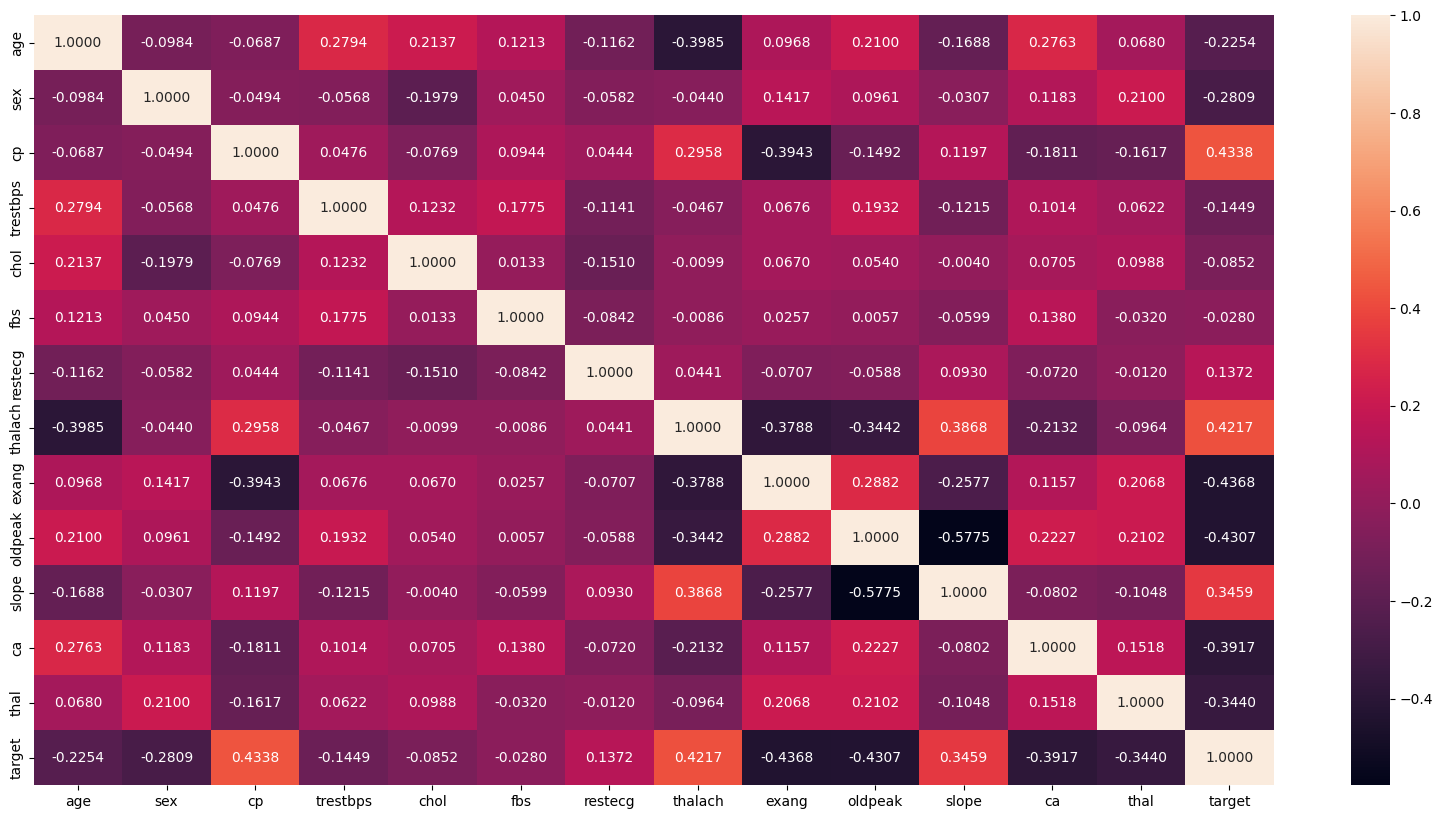

In [45]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt="1.4f")

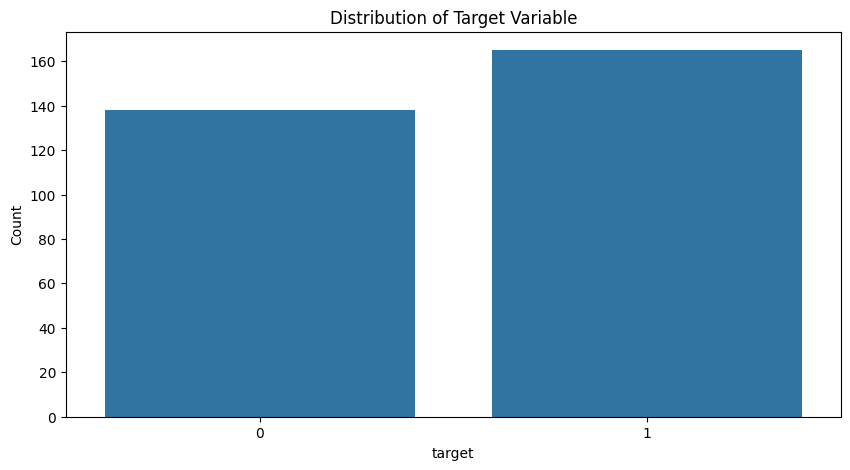

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.ylabel('Count')
plt.show()

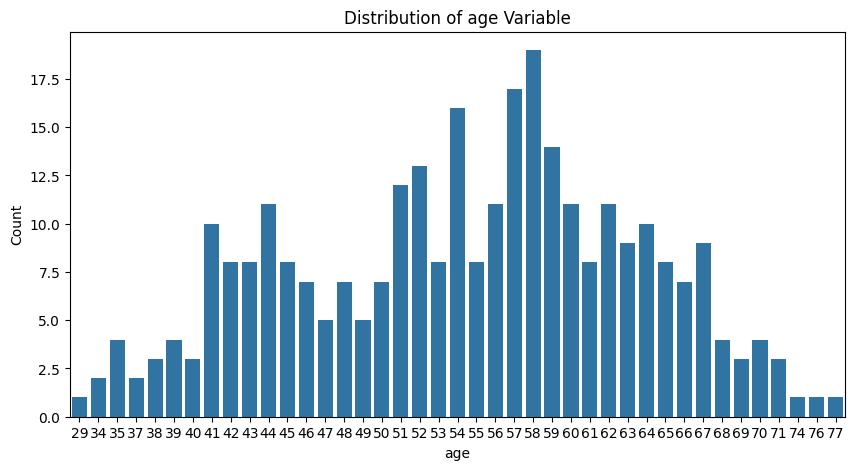

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x='age', data=data)
plt.title('Distribution of age Variable')
plt.ylabel('Count')
plt.show()

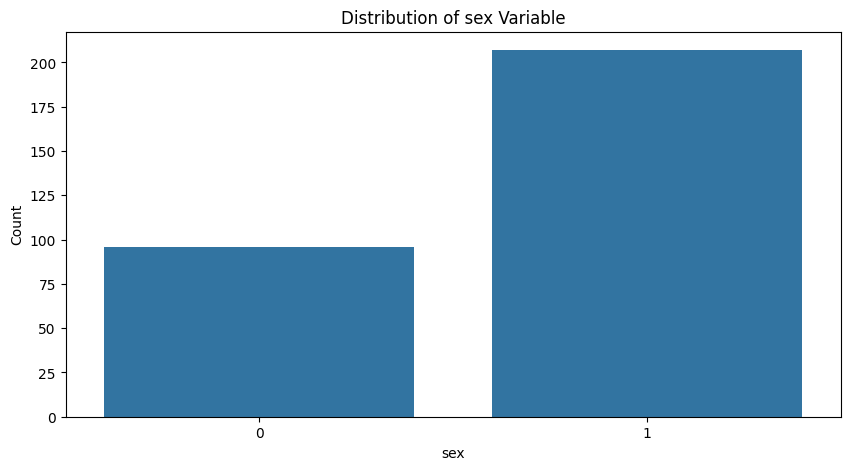

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=data)
plt.title('Distribution of sex Variable')
plt.ylabel('Count')
plt.show()

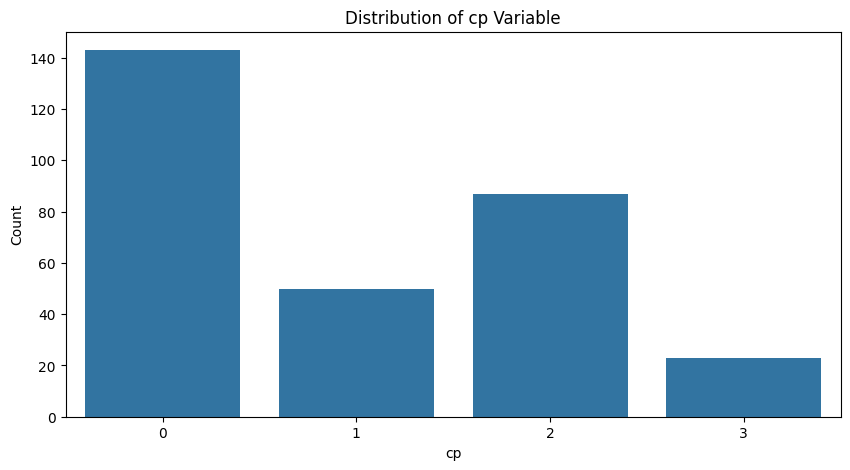

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(x='cp', data=data)
plt.title('Distribution of cp Variable')
plt.ylabel('Count')
plt.show()

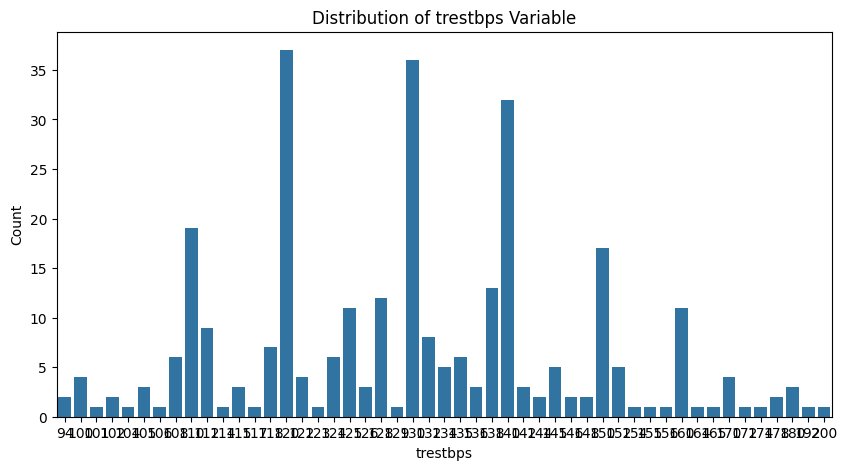

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(x='trestbps', data=data)
plt.title('Distribution of trestbps Variable')
plt.ylabel('Count')
plt.show()

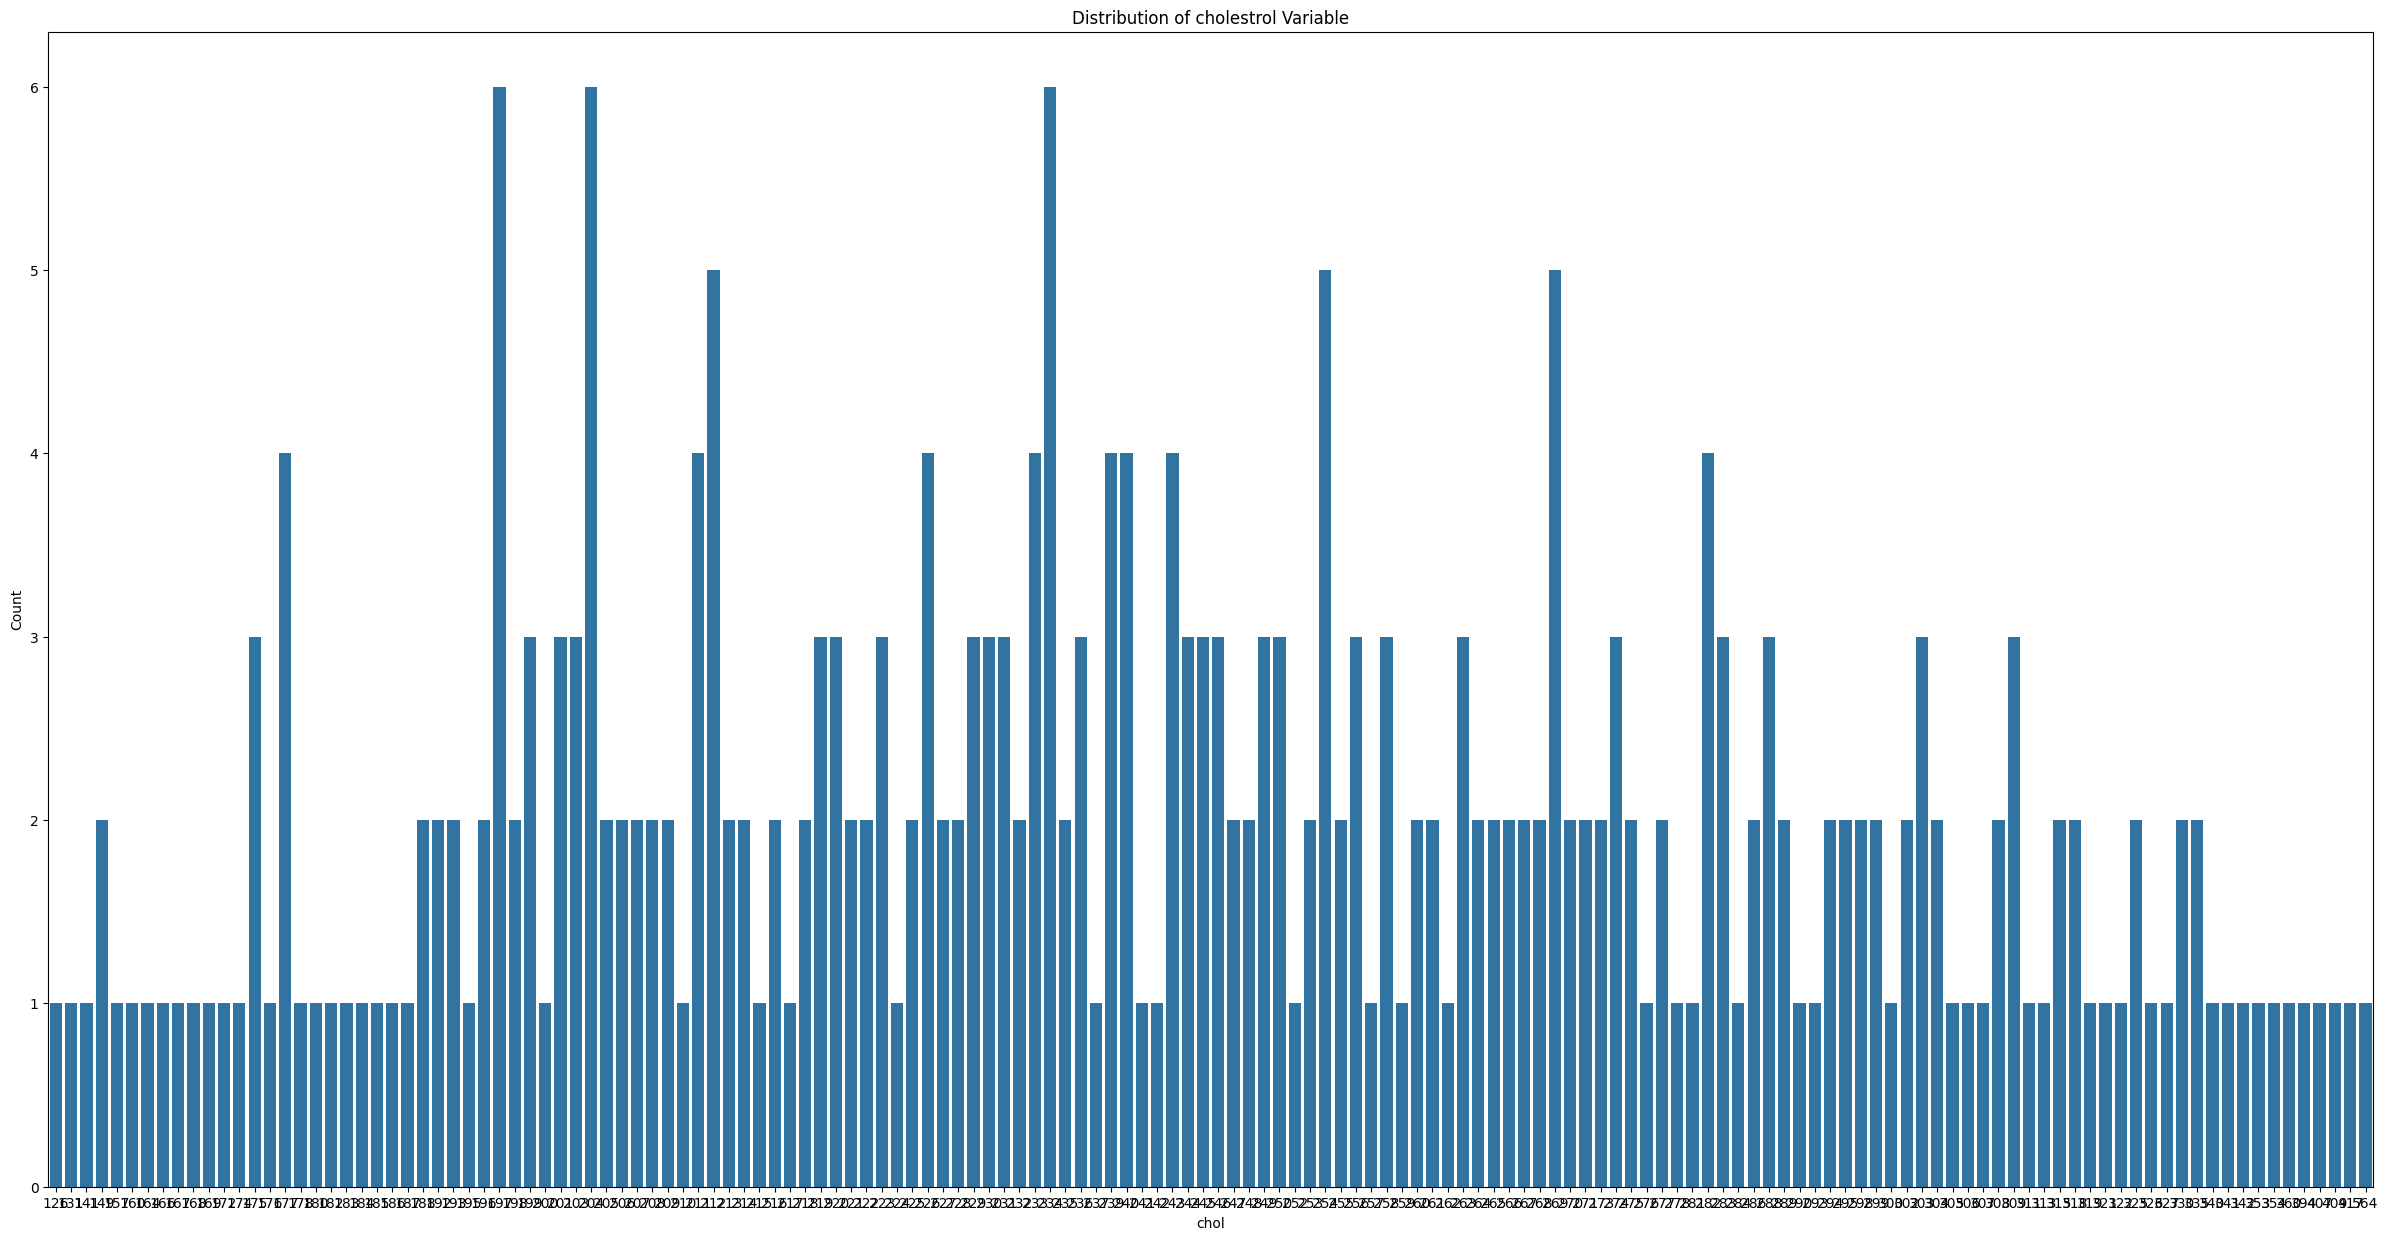

In [93]:
plt.figure(figsize=(30,15))
sns.countplot(x='chol', data=data)
plt.title('Distribution of cholestrol Variable')
plt.ylabel('Count')
plt.show()

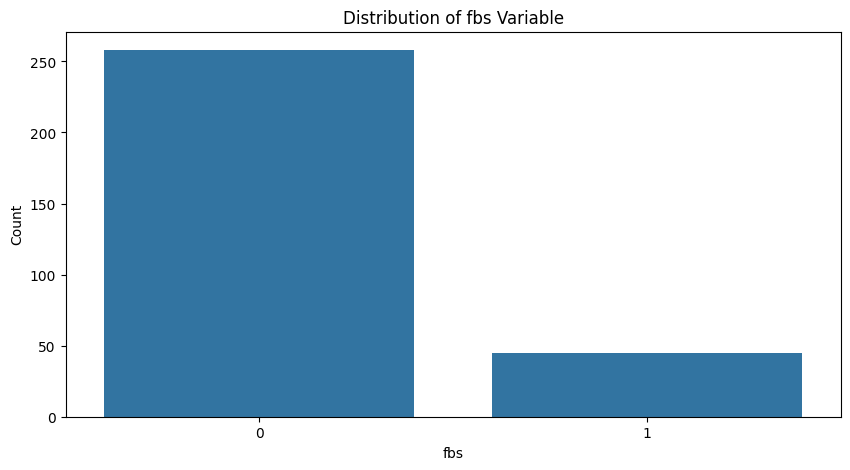

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs', data=data)
plt.title('Distribution of fbs Variable')
plt.ylabel('Count')
plt.show()

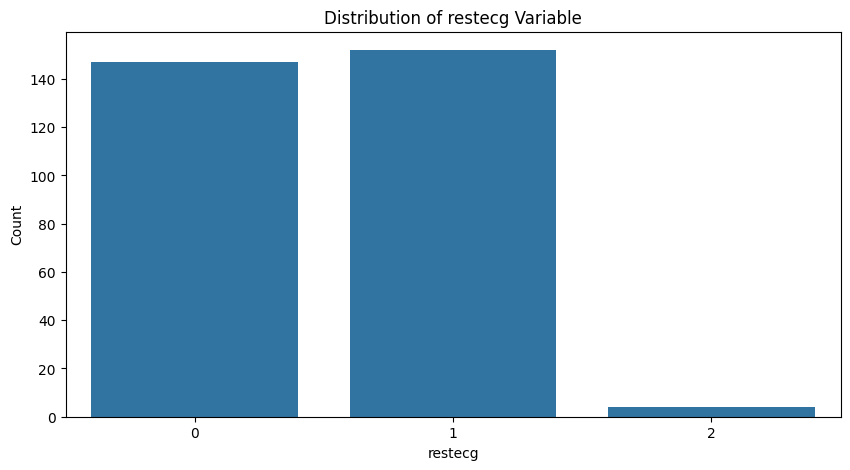

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='restecg', data=data)
plt.title('Distribution of restecg Variable')
plt.ylabel('Count')
plt.show()

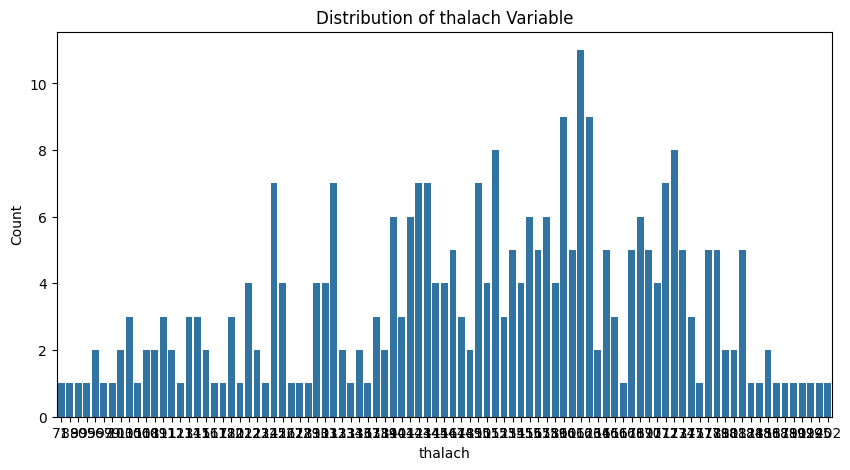

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x='thalach', data=data)
plt.title('Distribution of thalach Variable')
plt.ylabel('Count')
plt.show()

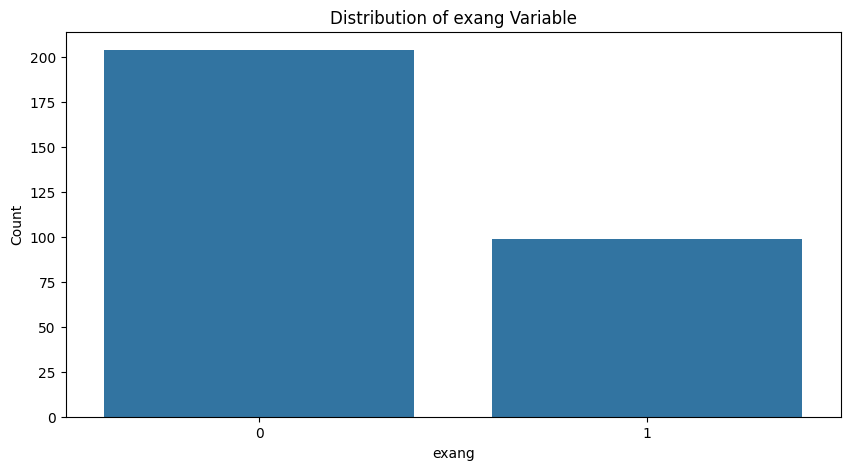

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x='exang', data=data)
plt.title('Distribution of exang Variable')
plt.ylabel('Count')
plt.show()

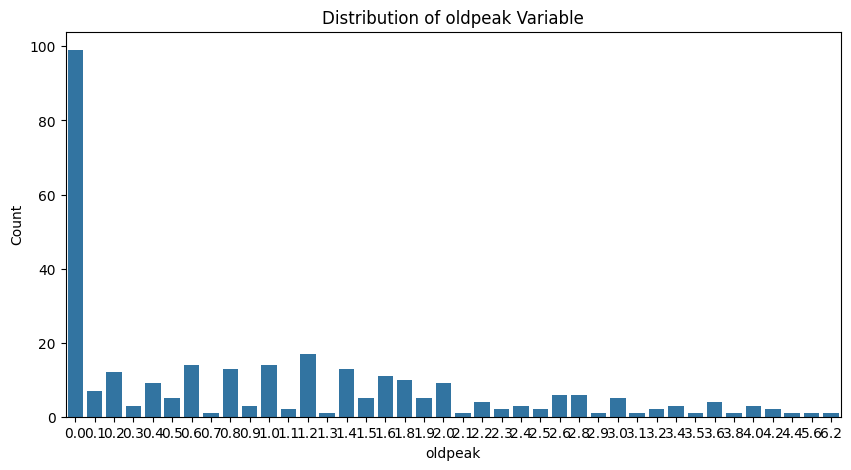

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(x='oldpeak', data=data)
plt.title('Distribution of oldpeak Variable')
plt.ylabel('Count')
plt.show()

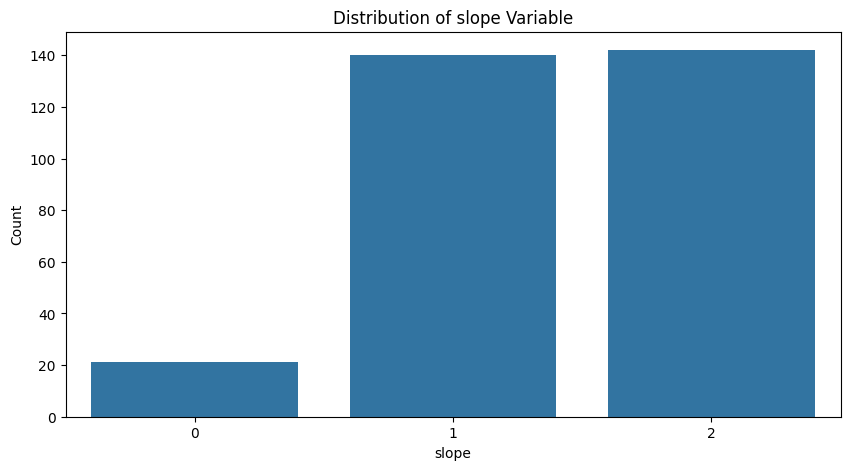

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x='slope', data=data)
plt.title('Distribution of slope Variable')
plt.ylabel('Count')
plt.show()

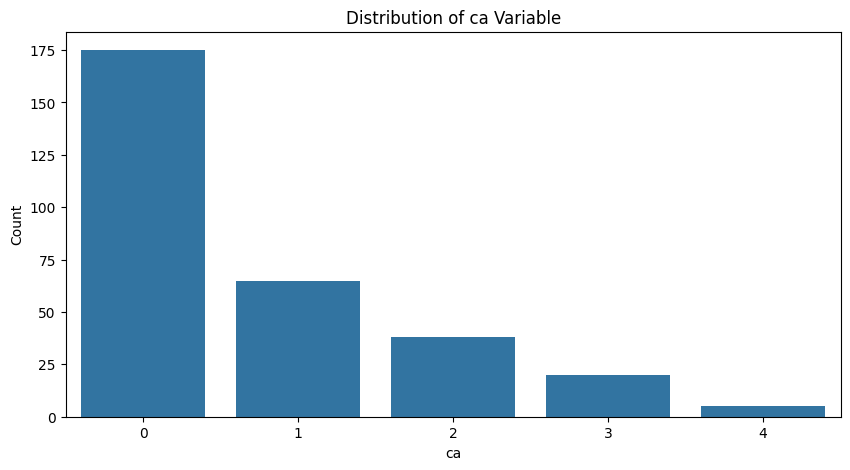

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x='ca', data=data)
plt.title('Distribution of ca Variable')
plt.ylabel('Count')
plt.show()

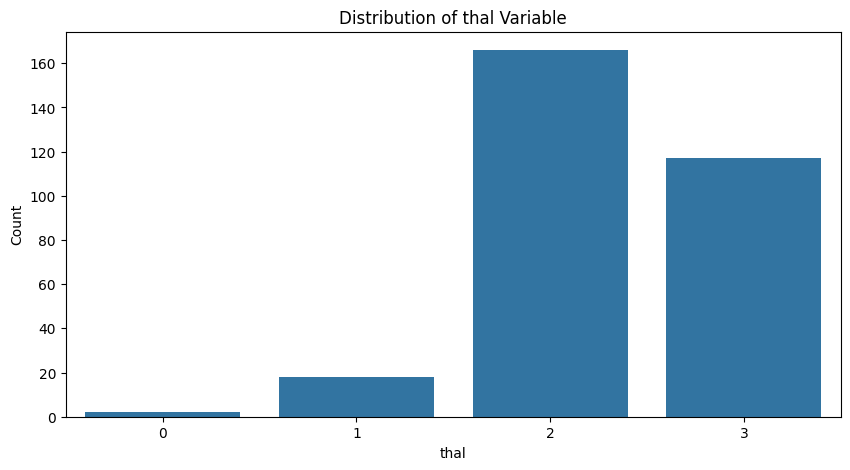

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x='thal', data=data)
plt.title('Distribution of thal Variable')
plt.ylabel('Count')
plt.show()

In [46]:
x=data.drop(["target"],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [47]:
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [49]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2


In [50]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3


In [51]:
y_train

225    0
6      1
235    0
301    0
83     1
      ..
265    0
109    1
85     1
65     1
237    0
Name: target, Length: 203, dtype: int64

In [52]:
y_test

207    0
31     1
248    0
229    0
204    0
      ..
134    1
165    0
69     1
168    0
86     1
Name: target, Length: 100, dtype: int64

In [53]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

0.84


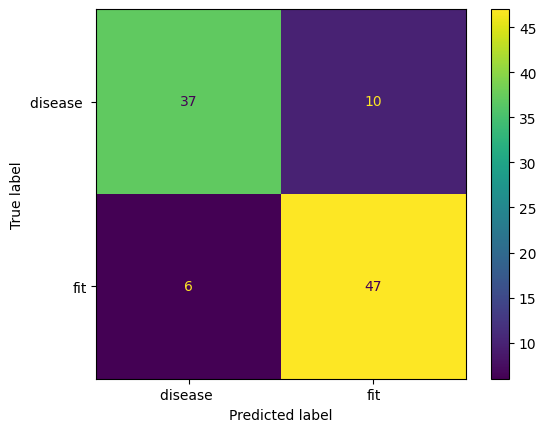

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        47
           1       0.82      0.89      0.85        53

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [54]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=["disease ","fit"])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [55]:
model=LogisticRegression(max_iter=25000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

0.87


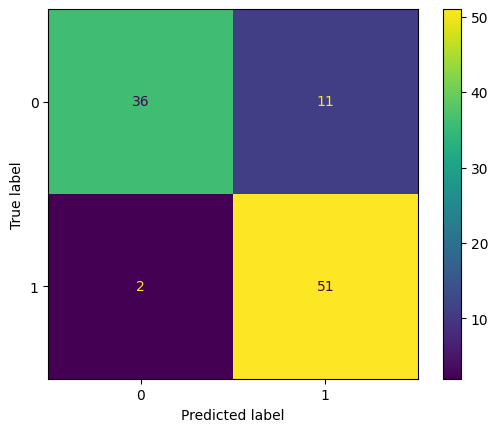

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        47
           1       0.82      0.96      0.89        53

    accuracy                           0.87       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.88      0.87      0.87       100



In [56]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=[0,1])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [58]:
model=RandomForestClassifier(max_depth=10000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


0.85


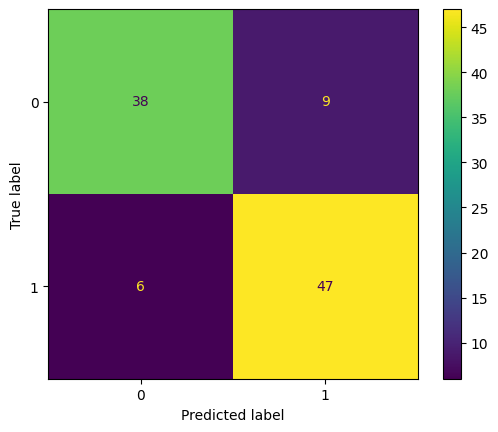

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        47
           1       0.84      0.89      0.86        53

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [62]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=[0,1])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [117]:
x_rel=data[["cp","thalach","slope"]]
x_rel

,cp,thalach,slope
0,3,150,0
1,2,187,0
2,1,172,2
3,1,178,2
4,0,163,2
...,...,...,...
298,0,123,1
299,3,132,1
300,0,141,1
301,0,115,1


In [118]:
y=data.target

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_rel,y,test_size=0.33)

In [120]:
x_train


,cp,thalach,slope
289,0,130,1
248,1,195,2
135,0,163,2
175,0,114,1
115,2,170,2
...,...,...,...
15,2,158,1
122,2,172,2
211,0,140,1
164,2,173,2


In [121]:
x_test

,cp,thalach,slope
163,2,173,2
131,1,162,1
296,0,136,1
134,1,163,2
132,1,162,2
...,...,...,...
172,1,160,1
169,0,155,0
117,3,162,1
108,1,162,2


In [122]:
y_train

289    0
248    0
135    1
175    0
115    1
      ..
15     1
122    1
211    0
164    1
207    0
Name: target, Length: 203, dtype: int64

In [123]:
y_test

163    1
131    1
296    0
134    1
132    1
      ..
172    0
169    0
117    1
108    1
267    0
Name: target, Length: 100, dtype: int64

In [124]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

0.66


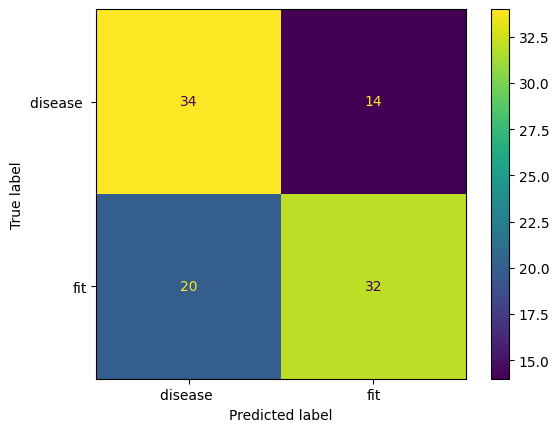

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        48
           1       0.70      0.62      0.65        52

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [125]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=["disease ","fit"])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [126]:
model=LogisticRegression(max_iter=25000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

0.75


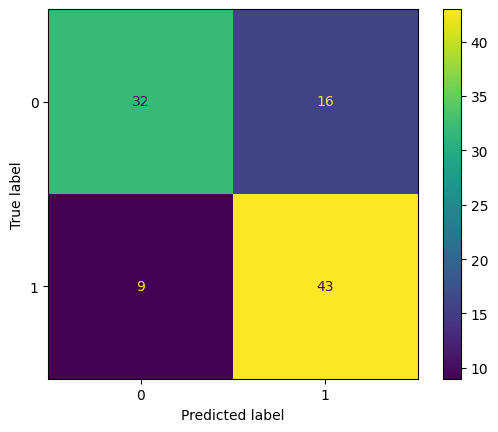

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        48
           1       0.73      0.83      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



In [127]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=[0,1])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))

In [128]:
model=RandomForestClassifier(max_depth=10000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


0.7


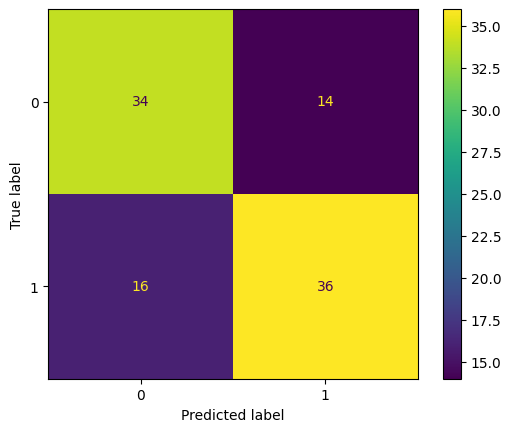

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        48
           1       0.72      0.69      0.71        52

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



In [129]:
acc=accuracy_score(y_test,y_pred)
print(acc)
c_m=confusion_matrix(y_test,y_pred)
c_dis=ConfusionMatrixDisplay(confusion_matrix=c_m,display_labels=[0,1])
c_dis.plot()
plt.show()
print(classification_report(y_test,y_pred))